# Análise exploratória de dados (EDA) em dados de texto 



O conjunto de dados contém comentários no Google Maps sobre uma atração turística em Maceió, Alagoas intitulada **A Cadeira Gigante de Maceió**. O conjunto de dados tem 250 linhas e 26 colunas, cada uma contendo  comentários, nome de usuário, classificação de comentário e demais informações.

![maceio.al.gov.br](https://maceioalgovbr.dhost.cloud/uploads/imagens/WhatsApp-Image-2022-01-08-at-14.26.58.jpeg)

## Importaçao e carregamento dos dados

In [23]:
!pip install  textblob

     -------------------------------------- 636.8/636.8 kB 1.5 MB/s eta 0:00:00


In [43]:
import numpy as np
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [17]:
df = pd.read_csv('C:/Users/Gilson Castro/Documents/EDA_NLP/cadeira.csv')

In [18]:
df.head(3)

,query,name,google_id,place_id,location_link,reviews_link,reviews_per_score,reviews,rating,review_id,...,review_img_urls,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id
0,https://www.google.com/search?q=cadeira+gigant...,A Cadeira Gigante de Maceió,0x70145d7bad433fb:0xe083c0f5c33ea91c,ChIJ-zPUutdFAQcRHKk-w_XAg-A,https://www.google.com/maps/place/A+Cadeira+Gi...,https://search.google.com/local/reviews?placei...,"{""1"": 36, ""2"": 25, ""3"": 104, ""4"": 293, ""5"": 2073}",2531,4.7,ChdDSUhNMG9nS0VJQ0FnSUMyN0tTSnV3RRAB,...,https://lh5.googleusercontent.com/p/AF1QipOx0E...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5,1649968496,04/14/2022 20:34:56,8,-2268757625489413860
1,https://www.google.com/search?q=cadeira+gigant...,A Cadeira Gigante de Maceió,0x70145d7bad433fb:0xe083c0f5c33ea91c,ChIJ-zPUutdFAQcRHKk-w_XAg-A,https://www.google.com/maps/place/A+Cadeira+Gi...,https://search.google.com/local/reviews?placei...,"{""1"": 36, ""2"": 25, ""3"": 104, ""4"": 293, ""5"": 2073}",2531,4.7,ChdDSUhNMG9nS0VJQ0FnSURPNXJELS1RRRAB,...,https://lh5.googleusercontent.com/p/AF1QipMWEB...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5,1656932100,07/04/2022 10:55:00,3,-2268757625489413860
2,https://www.google.com/search?q=cadeira+gigant...,A Cadeira Gigante de Maceió,0x70145d7bad433fb:0xe083c0f5c33ea91c,ChIJ-zPUutdFAQcRHKk-w_XAg-A,https://www.google.com/maps/place/A+Cadeira+Gi...,https://search.google.com/local/reviews?placei...,"{""1"": 36, ""2"": 25, ""3"": 104, ""4"": 293, ""5"": 2073}",2531,4.7,ChdDSUhNMG9nS0VJQ0FnSUNlaTRINGxRRRAB,...,https://lh5.googleusercontent.com/p/AF1QipOTl7...,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m8!...,5,1663953491,09/23/2022 17:18:11,2,-2268757625489413860


In [19]:
df['review_text'][4]

'De fato, Maceió é massa! Vários locais Instagramáveis com opções de fotografias filmagens com drone por R$25. Valorizou ainda mais a belíssima orla da Ponta Verde. Chegamos por volta das 8h da manhã de um sábado e não pegamos fila alguma.'

In [20]:
df['review_text'][30]

'Mesmo na fila, foi divertido rs todos passeando sem se estressar. Cadeira gigante mesmo!! Fácil localização e gratuita.'

In [5]:
df.columns # colunas do dataset

Index(['query', 'name', 'google_id', 'place_id', 'location_link',
       'reviews_link', 'reviews_per_score', 'reviews', 'rating', 'review_id',
       'author_link', 'author_title', 'author_id', 'author_image',
       'review_text', 'review_img_url', 'review_img_urls', 'owner_answer',
       'owner_answer_timestamp', 'owner_answer_timestamp_datetime_utc',
       'review_link', 'review_rating', 'review_timestamp',
       'review_datetime_utc', 'review_likes', 'reviews_id'],
      dtype='object')

In [7]:
df.shape # linhas e colunas 

(250, 26)

In [14]:
# verificando nossa coluna (comentário sobre a cadeira ) de interesse ( spoiler!!)
df['review_text'][45]

'Excelente local para fotografia, agora é bom lembrar que tem outras pessoas na fila aguardando.\nNo dia que fui uma garota tirou umas 100 fotos passando mais de 10 minutos no local. Tremenda falta de respeito.\nE lembrando que devido a altura da cadeira é preciso ajuda para subir, logo tem um pessoal que empresta uma pequena escada em troca de uma gorjeta.(Válido).'

In [16]:
#verificando outra coluna de interesse chamada de classificação de avaliação
df['review_rating'].value_counts()

5    192
4     29
3     25
1      3
2      1
Name: review_rating, dtype: int64

In [22]:
#verificando valores nulos
df.isnull().sum()

query                                    0
name                                     0
google_id                                0
place_id                                 0
location_link                            0
reviews_link                             0
reviews_per_score                        0
reviews                                  0
rating                                   0
review_id                                0
author_link                              0
author_title                             0
author_id                                0
author_image                             0
review_text                              0
review_img_url                         132
review_img_urls                        132
owner_answer                           250
owner_answer_timestamp                 250
owner_answer_timestamp_datetime_utc    250
review_link                              0
review_rating                            0
review_timestamp                         0
review_date

#  Pré processamento & limpeza 

In [29]:
# separando as colunas necessarias para a análise exploratória pois eu não quero dropar tudo
df_filtro = df[['review_text','review_rating']]
df_filtro.head(3)


,review_text,review_rating
0,A cadeira gigante fica localizada em frente ao...,5
1,Ponto turístico na orla de Maceió bastante mov...,5
2,Excelente ponto turístico para algumas fotos.\...,5


In [ ]:
df_filtro.head(3)

In [36]:
#função realizar a limpeza da coluna de comentarios
import re
import string

def preprocessamento(reviewtext):
    reviewtext = reviewtext.str.replace(r"(<br/>)", "")
    reviewtext = reviewtext.str.replace(r"\w*\d\w*", "", flags=re.IGNORECASE)  # Dígitos e Palavras que contêm dígitos
    reviewtext = reviewtext.str.replace(r"[%s]" % re.escape(string.punctuation), "")
    reviewtext = reviewtext.str.replace(r" +", " ")
     
    return reviewtext

 


In [37]:
#aplicando a função na coluna
df_filtro['review_text'] = preprocessamento(df_filtro['review_text'])

C:\Users\Gilson Castro\AppData\Local\Temp\ipykernel_13864\608469413.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  reviewtext = reviewtext.str.replace(r"(<br/>)", "")
C:\Users\Gilson Castro\AppData\Local\Temp\ipykernel_13864\608469413.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  reviewtext = reviewtext.str.replace(r"\w*\d\w*", "", flags=re.IGNORECASE)  # Dígitos e Palavras que contêm dígitos
C:\Users\Gilson Castro\AppData\Local\Temp\ipykernel_13864\608469413.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  reviewtext = reviewtext.str.replace(r"[%s]" % re.escape(string.punctuation), "")
C:\Users\Gilson Castro\AppData\Local\Temp\ipykernel_13864\608469413.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  reviewtext = reviewtext.str.replace(r" +", " ")
C:\Users\Gilson Castro\A

## Calculando a polaridade dos comentários usando o TextBlob

O analisador de sentimento TextBlob retorna duas propriedades para uma frase de entrada:

**Polaridade**: É um valor numérico entre -1 e 1. -1 indica um sentimento negativo, 0 indica neutro e +1 indica sentimentos positivos. É uma medida de quão positivo ou negativo é o sentimento expresso na frase.

**Subjetividade**: Também é um valor numérico entre 0 e 1. 0 significa que a frase é objetiva, ou seja, é factual e não contém opiniões pessoais. Por outro lado, 1 indica que a frase é altamente subjetiva, contendo opiniões pessoais, emoções ou julgamentos.

Portanto, a polaridade indica se o sentimento é positivo ou negativo, enquanto a subjetividade indica se a frase é objetiva ou subjetiva.

In [38]:
df_filtro['polaridade']=df_filtro['review_text'].map(lambda text: TextBlob(text).sentiment.polarity)


C:\Users\Gilson Castro\AppData\Local\Temp\ipykernel_13864\2733351460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro['polaridade']=df_filtro['review_text'].map(lambda text: TextBlob(text).sentiment.polarity)


In [39]:
df_filtro.head(4)

,review_text,review_rating,polaridade
0,A cadeira gigante fica localizada em frente ao...,5,0.266667
1,Ponto turístico na orla de Maceió bastante mov...,5,0.333333
2,Excelente ponto turístico para algumas fotos\n...,5,0.000000
3,Bem lindaaa\nNo dia q eu fui tinha muita gente...,5,0.000000


# Distribuição Univariada de Características

A distribuição univariada de características analisa a distribuição de uma única variável em um conjunto de dados, sem levar em conta outras variáveis. É fundamental para entender a variabilidade e a forma dessa característica específica.

## Distribuição de Polaridade

C:\Users\Gilson Castro\AppData\Local\Temp\ipykernel_13864\802937219.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtro["polaridade"],hist=True)


<Axes: xlabel='polaridade', ylabel='Density'>

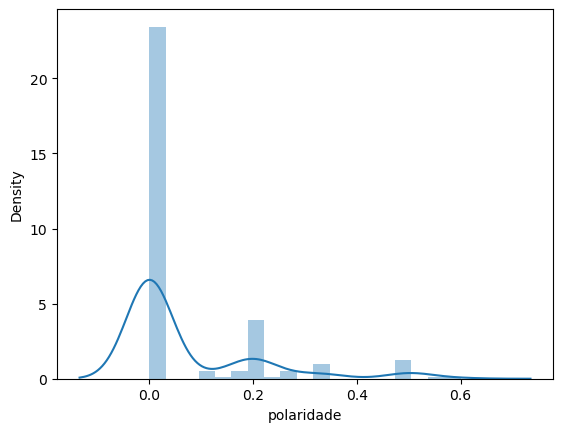

In [42]:
sns.distplot(df_filtro["polaridade"],hist=True)

Neste gráfico acima mostra uma polaridade próxima de 0 indica que o sentimento expresso na frase é neutro. Isso significa que a frase não apresenta um sentimento positivo ou negativo forte, mas é mais equilibrada ou ambígua em termos de emoções ou opiniões.

In [69]:
df_filtro['polaridade'].describe()

count    250.000000
mean       0.070089
std        0.135485
min        0.000000
25%        0.000000
50%        0.000000
75%        0.100000
max        0.600000
Name: polaridade, dtype: float64

## Distribuição da classificação dos comentários

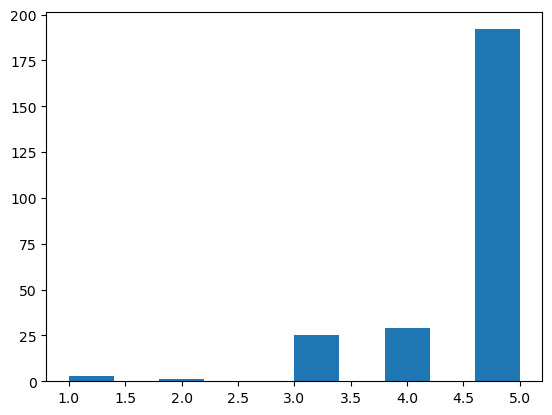

In [44]:
plt.hist(df_filtro['review_rating'])
plt.show()

In [66]:
# estatistica descritiva das reviews
df_filtro['review_rating'].describe().T

count    250.000000
mean       4.624000
std        0.777846
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: review_rating, dtype: float64

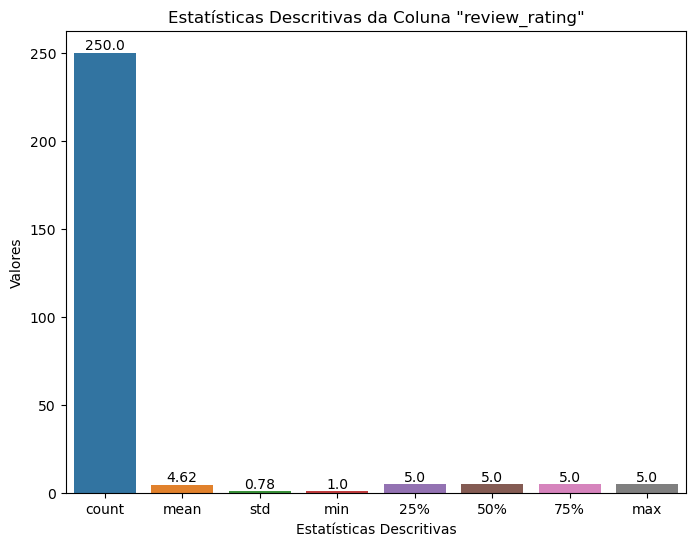

In [68]:
# Criando o gráfico de barras com as estatísticas descritivas
plt.figure(figsize=(8, 6))
sns.barplot(x=df_filtro['review_rating'].describe().index, y=df_filtro['review_rating'].describe().values)
plt.xlabel('Estatísticas Descritivas')
plt.ylabel('Valores')
plt.title('Estatísticas Descritivas da Coluna "review_rating"')

# Adicionando os valores como rótulos no gráfico
for index, value in enumerate(df_filtro['review_rating'].describe().values):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()

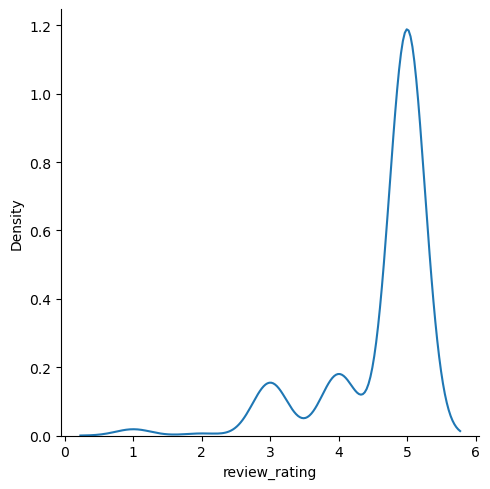

In [46]:
sns.displot(df_filtro, x="review_rating", kind="kde")

## N-gramas

In [54]:
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to C:\Users\Gilson
[nltk_data]     Castro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



N-gramas são sequências de n elementos consecutivos em uma sequência de texto, onde "n" pode ser qualquer número inteiro positivo. Os unigramas são um tipo específico de n-grama, onde "n" é igual a 1, ou seja, são sequências compostas por uma única palavra em um texto.

A distribuição dos principais unigramas refere-se à frequência de ocorrência de cada palavra individual no texto. Essa análise mostra quais palavras são mais comuns e quais são menos frequentes na sequência de texto, permitindo identificar padrões ou palavras-chave significativas no conjunto de dados textual.

C:\Users\Gilson Castro\AppData\Local\Temp\ipykernel_13864\2126703693.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.barplot(x = 'Palavras',y='Contagem',data=df_ngram,ci = None, ax=ax)


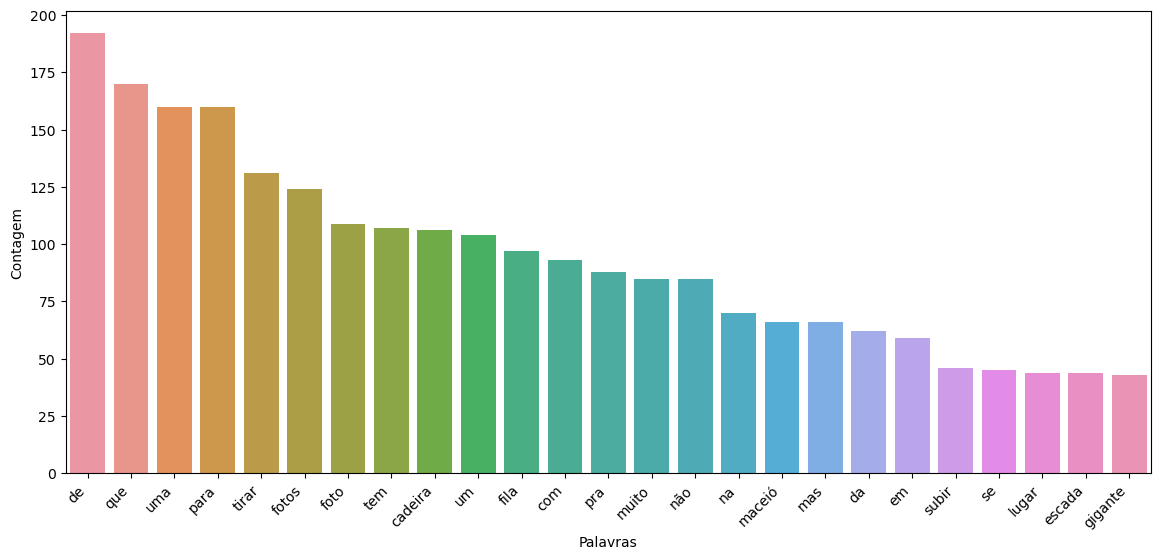

In [51]:
# função para Distribuição dos principais Unigramas

def get_top_ngrams(df,n=None):
    vec = CountVectorizer().fit(df)
     
    bag_of_words = vec.transform(df)
     
    sum_words = bag_of_words.sum(axis=0)
     
    words_freq = [(word,sum_words[0,i]) for word,i in vec.vocabulary_.items()]
    #words_freq = list(cv_fit.vocabulary_.items())
    words_freq = sorted(words_freq,key=lambda x:x[1],reverse=True)
     
    return words_freq[:n]
 
common_words = get_top_ngrams(df_filtro['review_text'],25)
 
df_ngram = pd.DataFrame(common_words,columns=['Palavras','Contagem'])
df_ngram = df_ngram.groupby('Palavras').sum()['Contagem'].sort_values(ascending=False).reset_index()
 
fig,ax = plt.subplots(figsize=(14,6))
fig = sns.barplot(x = 'Palavras',y='Contagem',data=df_ngram,ci = None, ax=ax)
 
ax.set_xticklabels(labels=df_ngram['Palavras'], rotation=45, ha='right')
plt.show()

## Distribuição dos principais unigramas (depois de remover as stopwords)

[nltk_data] Downloading package stopwords to C:\Users\Gilson
[nltk_data]     Castro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Gilson Castro\AppData\Local\Temp\ipykernel_13864\3100547170.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro['review_text'] = df_filtro['review_text'].apply(remove_portuguese_stopwords)
C:\Users\Gilson Castro\AppData\Local\Temp\ipykernel_13864\3100547170.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig = sns.barplot(x='Palavras', y='Contagem', data=df_ngram, ci=None, ax=ax)


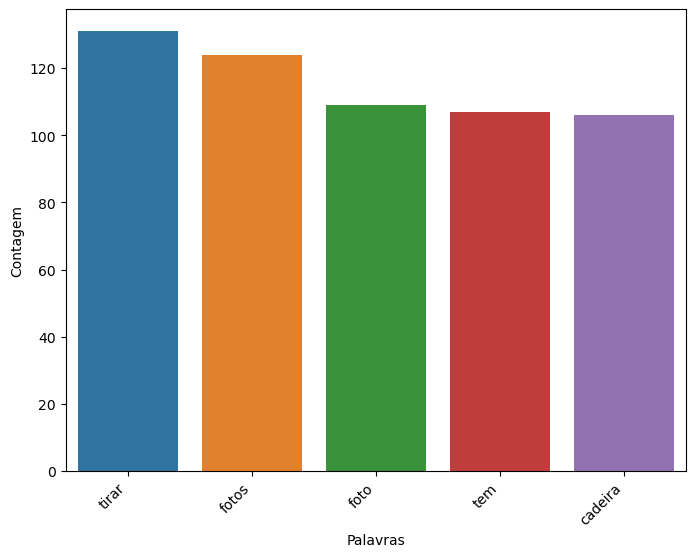

In [58]:
# função para Distribuição dos principais Unigramas
nltk.download('stopwords')
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Função para remover stop words em português
def remove_portuguese_stopwords(text):
    stopwords_pt = set(["a", "ao", "aos", "aquela", "aquelas", "aquele", "aqueles", "aquilo", "as", "até", "com", "como",
                        "da", "das", "de", "dela", "delas", "dele", "deles", "do", "dos", "e", "ela", "elas", "ele",
                        "eles", "em", "entre", "essa", "essas", "esse", "esses", "esta", "estas", "este", "estes",
                        "isso", "isto", "já", "lhe", "lhes", "mais", "mas", "me", "mesmo", "meu", "meus", "minha",
                        "minhas", "muito", "na", "nas", "não", "no", "nos", "nós", "nossa", "nossas", "nosso", "nossos",
                        "num", "numa", "nunca", "o", "os", "ou", "para", "pela", "pelas", "pelo", "pelos", "por", "que",
                        "quem", "se", "sem", "seu", "seus", "sua", "suas", "também", "te", "teu", "teus", "tu", "tua",
                        "tuas", "um", "uma", "você", "vocês", "vos", "à", "às"])

    words = text.split()
    words_cleaned = [word for word in words if word.lower() not in stopwords_pt]
    return " ".join(words_cleaned)

 
df_filtro['review_text'] = df_filtro['review_text'].apply(remove_portuguese_stopwords)

# Função para Distribuição dos principais Unigramas
def get_top_ngrams(df, n=None):
    vec = CountVectorizer().fit(df)
    bag_of_words = vec.transform(df)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Obtendo os principais unigramas
common_words = get_top_ngrams(df_filtro['review_text'], 5)

# Criando o DataFrame e plotando o gráfico de barras
df_ngram = pd.DataFrame(common_words, columns=['Palavras', 'Contagem'])
fig, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x='Palavras', y='Contagem', data=df_ngram, ci=None, ax=ax)

ax.set_xticklabels(labels=df_ngram['Palavras'], rotation=45, ha='right')
plt.show()




## Gráfico conjunto de densidade 2D de polaridade de sentimento vs. avaliação

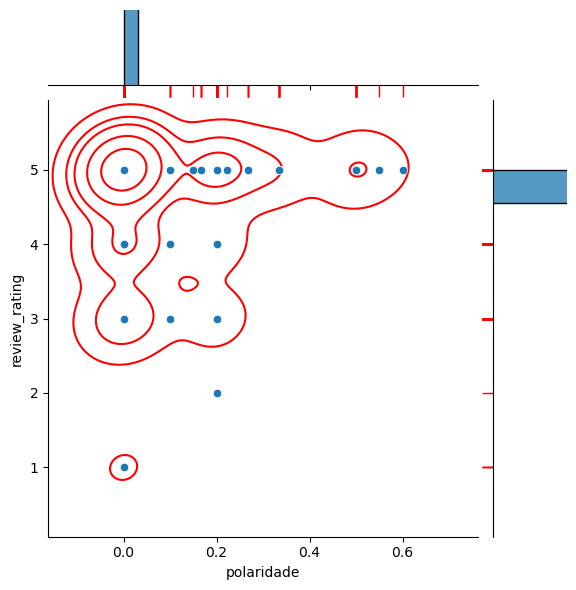

In [59]:
g = sns.jointplot(data=df_filtro, x="polaridade", y="review_rating")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

A maioria das análises se concentrou na classificação de 5 e na polaridade de 0,25 a 0,5, dando uma sensação geral de críticas positivas para os comentários

## Modelagem de tópicos

In [65]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Função para remover stop words em português
def remove_portuguese_stopwords(text):
    stopwords_pt = set(stopwords.words('portuguese'))

    words = text.split()
    words_cleaned = [word for word in words if word.lower() not in stopwords_pt]
    return " ".join(words_cleaned)

# Removendo as stop words em português da coluna reviews
df_filtro['review_text'] = df_filtro['review_text'].apply(remove_portuguese_stopwords)


reindexed_data = df_filtro['review_text']

# Inicializando o TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Convertendo os dados para uma matriz
reindexed_data = reindexed_data.values

# Criando a matriz de termos do documento usando TfidfVectorizer
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)

n_topics = 10 # definindo o numero de topicos

# Inicializando o modelo LSA
lsa_model = TruncatedSVD(n_components=n_topics)

# Aplicando o modelo LSA para reduzir a dimensionalidade
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

# Obtendo os tópicos usando os componentes do LSA
terms = tfidf_vectorizer.get_feature_names_out()
topics = {}
for i, topic in enumerate(lsa_model.components_):
    topic_terms = [terms[j] for j in topic.argsort()[:-6:-1]]  # Top 5 termos de cada tópico
    topics[f"Topico {i+1}"] = topic_terms

# Imprimindo os 10 tópicos e os termos associados
for topic, terms in topics.items():
    print(f"{topic}: {', '.join(terms)}")


Topico 1: tirar, foto, fotos, cadeira, pra
Topico 2: maceió, gigante, linda, cadeira, lindo
Topico 3: fotos, boa, gigante, subir, lindas
Topico 4: local, ponto, turístico, fotos, ótimo
Topico 5: lugar, pra, ótimo, lindo, ter
Topico 6: ponto, turístico, lindo, escada, subir
Topico 7: pra, ponto, gostei, turístico, grande
Topico 8: maceió, vc, visita, cidade, escada
Topico 9: lugar, pena, vale, top, ficam
Topico 10: legal, gostei, fotos, tudo, lindo


C:\Users\Gilson Castro\AppData\Local\Temp\ipykernel_13864\962114856.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtro['review_text'] = df_filtro['review_text'].apply(remove_portuguese_stopwords)


# Conclusões

Com base nas estatísticas descritivas e nos tópicos gerados a partir dos dados, podemos tirar as seguintes conclusões sobre a **cadeira gigante de Maceió**:

1. **Satisfação dos visitantes**: A média das avaliações é alta (aproximadamente 4.624 em 5), o que indica que, em geral, os visitantes estão satisfeitos com a experiência relacionada à cadeira gigante de Maceió.

2. **Alta classificação**: A grande maioria das avaliações está na pontuação máxima de 5.0, e o terceiro quartil é 5.0, o que sugere que muitos produtos relacionados à cadeira gigante de Maceió receberam avaliações muito positivas.

3. **Opiniões positivas**: Os tópicos gerados a partir dos dados mostram que as palavras mais frequentes associadas à cadeira gigante de Maceió são positivas, como "linda", "ótimo", "legal", "gostei" e "lindo". Isso indica que os clientes têm opiniões positivas sobre a experiência.

4. **Ponto turístico atraente**: Os tópicos também indicam que a cadeira gigante de Maceió é vista como um ponto turístico atraente e fotogênico, com muitos clientes mencionando fotos, pontos turísticos, local, escada e outras palavras relacionadas.

5. **Diversidade de opiniões**: Embora a maioria das avaliações seja muito positiva, existem algumas avaliações com pontuações mais baixas (mínimo de 1.0) e uma pequena dispersão nos dados (desvio padrão de aproximadamente 0.778). Isso indica que há uma diversidade de opiniões e experiências dos visitantes em relação à cadeira gigante de Maceió.

6. As estatísticas descritivas da **polaridade das avaliações** mostram que a maioria das avaliações é neutra ou levemente inclinada para a positividade. A polaridade média é próxima de zero, sugerindo que as avaliações têm uma tendência a serem neutras ou pouco inclinadas a serem positivas ou negativas. No entanto, existem algumas avaliações positivas, mas a maioria das avaliações possui uma polaridade baixa, indicando uma quantidade significativa de avaliações neutras.

# Referências

https://textblob.readthedocs.io/en/dev/

https://maceio.al.gov.br/noticias/secom/cadeira-de-praia-gigante-conquista-publico-e-alcanca-10-milhoes-de-views-em-tres-dias